In [1]:
using UnitCommitment
using HiGHS
using JuMP

ex_instance = UnitCommitment.read("../data/instance_2021_Q1_1/InputData.json")
solver = HiGHS.Optimizer

model = UnitCommitment.build_model(
    instance = ex_instance,
    optimizer = solver,
)

[ Info: Building model...
[ Info: Building scenario s1 with probability 1.0
[ Info: Built model in 1.47 seconds


A JuMP Model
├ solver: HiGHS
├ objective_sense: MIN_SENSE
│ └ objective_function_type: AffExpr
├ num_variables: 38448
├ num_constraints: 109598
│ ├ AffExpr in MOI.EqualTo{Float64}: 15963
│ ├ AffExpr in MOI.GreaterThan{Float64}: 2016
│ ├ AffExpr in MOI.LessThan{Float64}: 45525
│ ├ AffExpr in MOI.Interval{Float64}: 14
│ ├ VariableRef in MOI.GreaterThan{Float64}: 17064
│ ├ VariableRef in MOI.LessThan{Float64}: 9720
│ └ VariableRef in MOI.ZeroOne: 19296
└ Names registered in the model
  └ :charge_rate, :curtail, :discharge_rate, :dwflexiramp, :dwflexiramp_shortfall, :eq_binary_link, :eq_commitment_status, :eq_ending_level, :eq_max_charge_rate, :eq_max_discharge_rate, :eq_min_charge_rate, :eq_min_discharge_rate, :eq_min_downtime, :eq_min_dwflexiramp, :eq_min_spinning_reserve, :eq_min_upflexiramp, :eq_min_uptime, :eq_net_injection, :eq_power_balance, :eq_prod_above_def, :eq_prod_limit, :eq_ramp_down, :eq_segprod_limit_a, :eq_segprod_limit_b, :eq_segprod_limit_c, :eq_shutdown_limit, :eq_simul

In [8]:
object_dictionary(model)



Dict{Symbol, Any} with 52 entries:
  :startup               => OrderedDict{Any, Any}(("gen_83802dcb", 1, 1)=>_[1],…
  :expr_net_injection    => OrderedDict{Any, Any}(("s1", "b1", 1)=>_[17281] + _…
  :eq_min_upflexiramp    => OrderedDict{Any, Any}()
  :eq_segprod_limit_a    => OrderedDict{Any, Any}(("s1", "gen_83802dcb", 1, 1)=…
  :discharge_rate        => OrderedDict{Any, Any}(("s1", "sto_2a96861c", 1)=>_[…
  :eq_ending_level       => OrderedDict{Any, Any}(("s1", "sto_2a96861c")=>_[336…
  :eq_prod_limit         => OrderedDict{Any, Any}(("s1", "gen_83802dcb", 1)=>-3…
  :eq_startup_restrict   => OrderedDict{Any, Any}(("gen_524d4c85", 1, 1)=>_[115…
  :eq_min_discharge_rate => OrderedDict{Any, Any}(("s1", "sto_2a96861c", 1)=>_[…
  :eq_power_balance      => OrderedDict{Any, Any}(("s1", 1)=>_[38377] = 0, ("s1…
  :is_charging           => OrderedDict{Any, Any}(("s1", "sto_2a96861c", 1)=>_[…
  :dwflexiramp_shortfall => OrderedDict{Any, Any}()
  :prod_profiled         => OrderedDict{Any, Any}((

# Step 2: Model

## Decision variables
- is_on[g,t] (binary). 1 if generator $g$ is on at time $t$
- switch_on[g,t] (binary). 1 if generator $g$ switches on at time $t$
- switch_off[g,t] (binary). 1 if generator $g$ switches off at time $t$
- startup[g,t,s] (binary). 1 if generator $g$ starts up at time $t$ under startup category $k$
- prod_above[s,g,t]: Amount of power produced by $g$ at time $t$ in scenario $s$ above the minimum
- segprod[s,g,t,k]: Amount of power produced by $g$ at time $t$ in piece-wise linear segment $k$ and scenario $s$


In [ ]:
import pandas as pd
df = pd.read_excel("../data/instance_2021_Q1_1/explanatory_variables.xlsx", sheet_name=1)
df

,Unnamed: 0,initial_power,initial_status
0,gen_83802dcb,431.000000,4
1,gen_e984b581,0.000000,-1
2,gen_b5a1740d,0.000000,-1
3,gen_028f1c6a,0.000000,-1
4,gen_524d4c85,0.000000,-4
5,gen_7e24edae,0.000000,-4
6,gen_7fb07604,0.000000,-4
7,gen_c806c2b7,0.000000,-1
8,gen_092072f9,0.000000,-1
9,gen_a49f469e,0.000000,-1


In [ ]:
import json
with open("../data/instance_2021_Q1_1/InputData.json", "r") as f:
    data = json.load(f)

thermal_generators = [k for (k, v) in data["Generators"].items() if v.get("Type", "") == "Thermal"]
print(len(thermal_generators), len(data["Generators"]))

51 68


# Step 1: Data

### Static data
Generators
- 1 solar
    - cost (assumed zero)
    - min power (0)
- 1 wind
    - cost (assumed zero)
    - min power (0)

- 15 hydroelectric generators (profiled)
    - cost (assumed zero)
    - min power (0)
    - max power (fixed quantity)

- 14 storage units
    - maximum level (MWh)
    - charge/discharge costs (assumed zero)
    - charge efficiency
    - discharge efficiency
    - min/max charge rate (MW)
    - initial level
    - last period min level
    - initial_level
    - last period min level

- 51 thermal generators
    - ramp up
    - ramp down
    - startup limit (MW)
    - shutdown limit (MW)
    - min downtime (h)
    - min uptime (h)
    - production cost curve (MW)
    - production cost curve ($)
    - startup costs ($)
    - startup delays (h)



### Dynamic data
Initial conditions. For each of the 51 thermal generators:
- initial power
- initial status

For each timestep $t$:
- system-wide demand
- wind profile
- solar profile

In [ ]:
data["Generators"]

counts = {}
counts2 = 0
for (k, v) in data["Generators"].items():
    gen_type = v["Type"]
    if gen_type in counts:
        counts[gen_type] += 1
    else:
        counts[gen_type] = 1

In [ ]:
len(data["Storage units"].items())

14

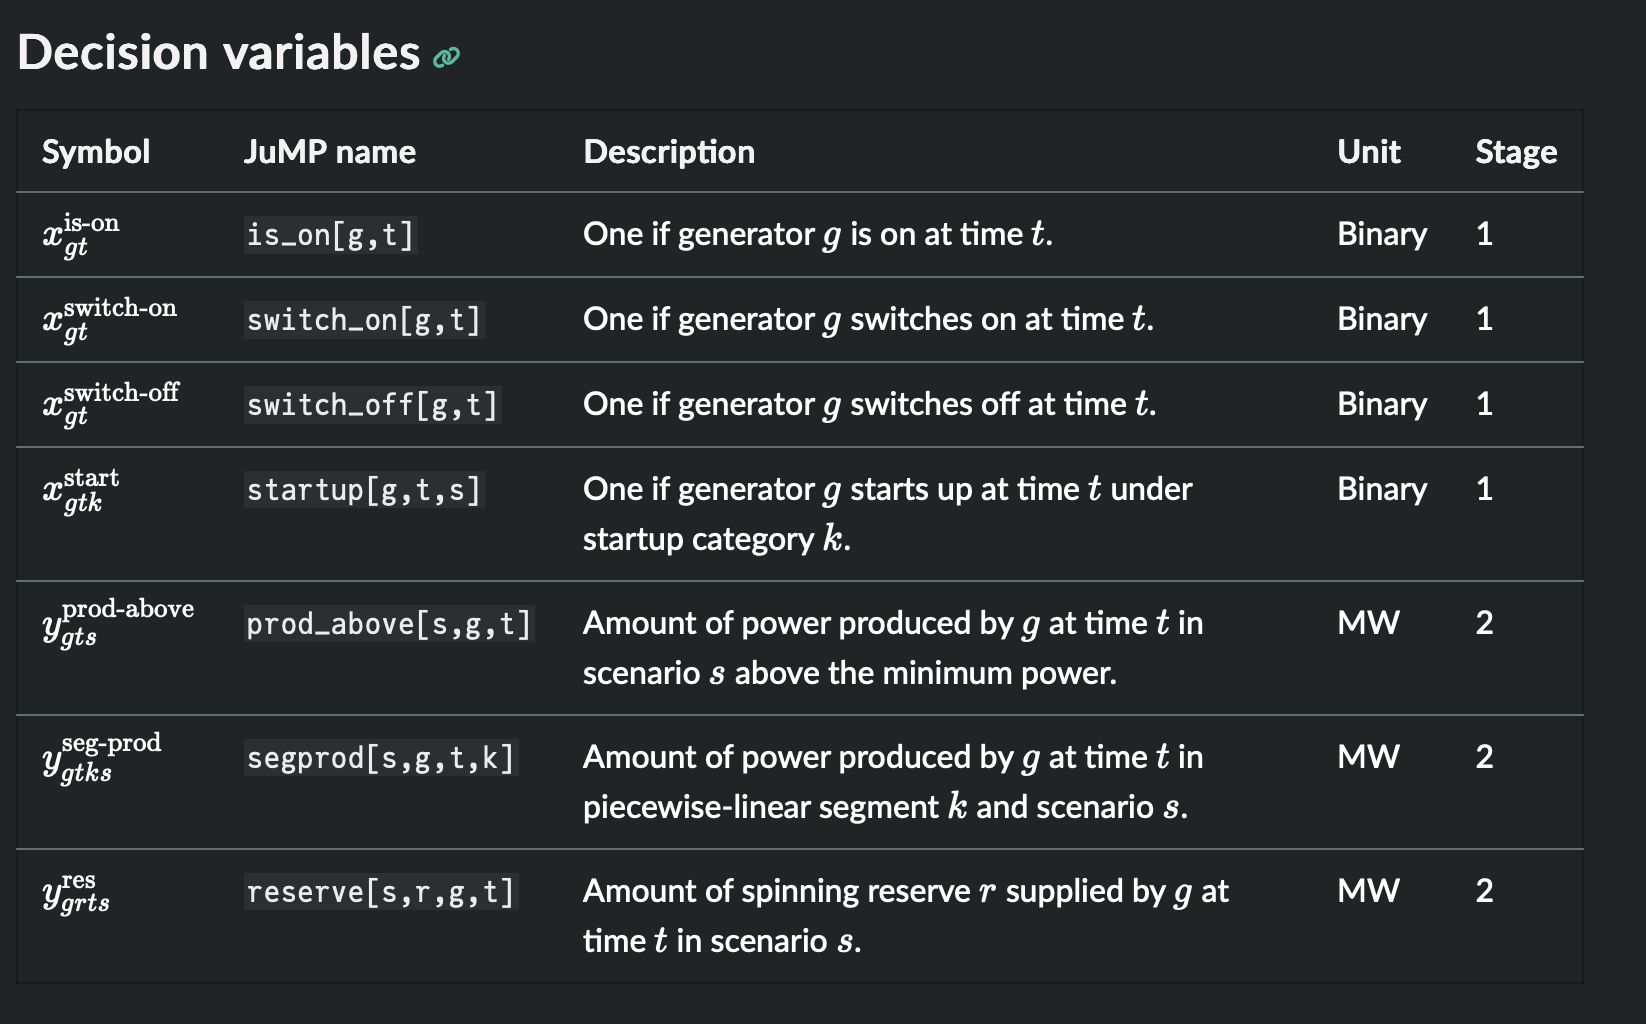

In [ ]:
## Constraints ##
#
# Binary link
# 

model[:eq_binary_link]


NameError: name 'model' is not defined